In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

!pip install dash
!pip install dash --upgrade
!pip install country-flag
!pip install streamlit
!pip install streamlit plotly pandas

ERROR: Could not find a version that satisfies the requirement country-flag (from versions: none)
ERROR: No matching distribution found for country-flag


In [4]:
%matplotlib inline


In [5]:
df = pd.read_excel('cleaned_global_happiness_with_iso.xlsx')

numeric_cols = ['Happiness score', 'GDP per capita', 'Social support',
                'Healthy life expectancy', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=numeric_cols + ['Country', 'Year'], inplace=True)

df.head()


,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,ISO_Code
0,1,Switzerland,Western Europe,7.587,8.26132,0.96240,73,0.99379,0.37289,0.23941,2015,CHE
1,2,Iceland,Western Europe,7.561,7.70416,1.00000,73,0.93884,0.54819,0.74371,2015,ISL
2,3,Denmark,Western Europe,7.527,7.84114,0.97030,70,0.96962,0.42894,0.12382,2015,DNK
3,4,Norway,Western Europe,7.522,8.63100,0.94917,71,1.00000,0.43598,0.33860,2015,NOR
4,5,Canada,North America and ANZ,7.427,7.84595,0.94322,71,0.94511,0.57560,0.40285,2015,CAN


In [6]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import random

df = pd.read_excel('cleaned_global_happiness_with_iso.xlsx')
app = dash.Dash(__name__)
random_colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in range(len(df))]

app.layout = html.Div([
   
    dcc.Input(id='country-input', type='text', placeholder='Enter Country Name...', debounce=True, style={'width': '300px'}),
    html.Div(id='country-output', style={'padding': '20px', 'fontSize': '20px', 'fontWeight': 'bold'}),
    dcc.Graph(id='happiness-plot'),
])
@app.callback(
    [Output('country-output', 'children'),
     Output('happiness-plot', 'figure')],
    [Input('country-input', 'value')]
)
def update_country_info(country_name):
    if country_name:
        country_name = country_name.strip().title()
        country_data = df[df['Country'].str.contains(country_name, case=False, na=False)]
        if not country_data.empty:
            country_info = country_data.iloc[0]  
            fig = px.bar(country_data, x='Country', y='Happiness score', 
                         text='Country', color='Country',
                         color_discrete_map={df['Country'][i]: random_colors[i] for i in range(len(df))})
            
            fig.update_layout(
                title=f"Happiness Score of {country_info['Country']}",
                xaxis_title="Country",
                yaxis_title="Happiness Score",
                template="plotly_white",
                showlegend=False
            )
            return f"{country_info['Country']}: Happiness Score = {country_info['Happiness score']}, GDP per capita = {country_info['GDP per capita']}, Social Support = {country_info['Social support']}", fig
        else:
            return "Country not found.", {}
    return "Enter a country name to search.", {}

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [7]:
import pandas as pd
import plotly.express as px

df = pd.read_excel('cleaned_global_happiness_with_iso.xlsx')
fig = px.histogram(df, x="Happiness score", nbins=30, color_discrete_sequence=["blue"], 
                   marginal="box", histnorm='probability density', 
                   title="Distribution of Happiness Scores")
fig.update_layout(
    xaxis_title="Happiness Score",
    yaxis_title="Probability Density",
    template="plotly_dark",  
    bargap=0.2  
)
fig.show()


In [8]:
import pandas as pd
import plotly.express as px
import random

random_colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in range(len(df))]
fig = px.histogram(df, x="Happiness score", nbins=30)
fig.update_traces(marker=dict(color=random_colors))

fig.update_layout(
    xaxis_title="Happiness Score",
    yaxis_title="Frequency",
    title="Distribution of Happiness Scores",
    template="plotly_dark"
)

fig.show()


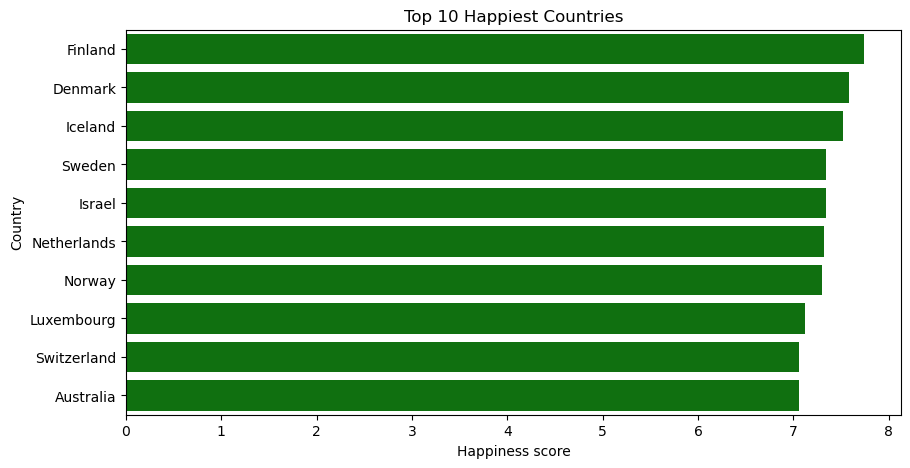

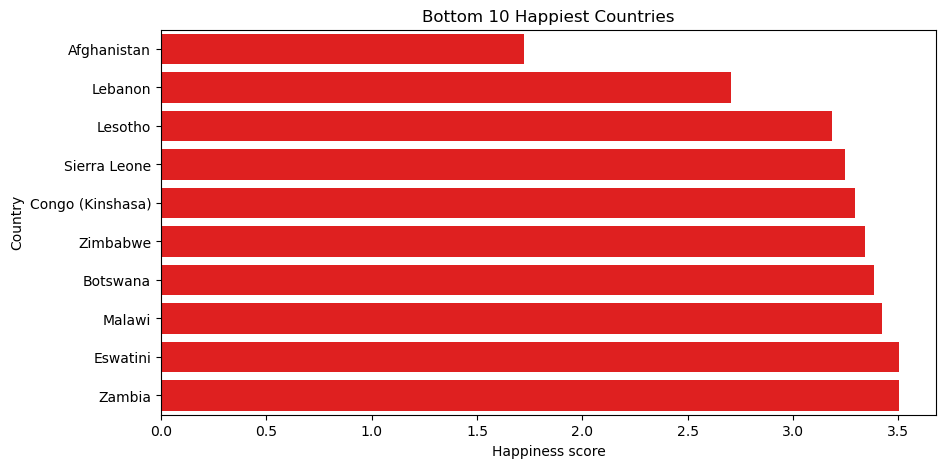

In [9]:
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

top_10 = latest_data.nlargest(10, 'Happiness score')
bottom_10 = latest_data.nsmallest(10, 'Happiness score')

plt.figure(figsize=(10,5))
sns.barplot(x='Happiness score', y='Country', data=top_10, color='green')
plt.title('Top 10 Happiest Countries')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Happiness score', y='Country', data=bottom_10, color='red')
plt.title('Bottom 10 Happiest Countries')
plt.show()


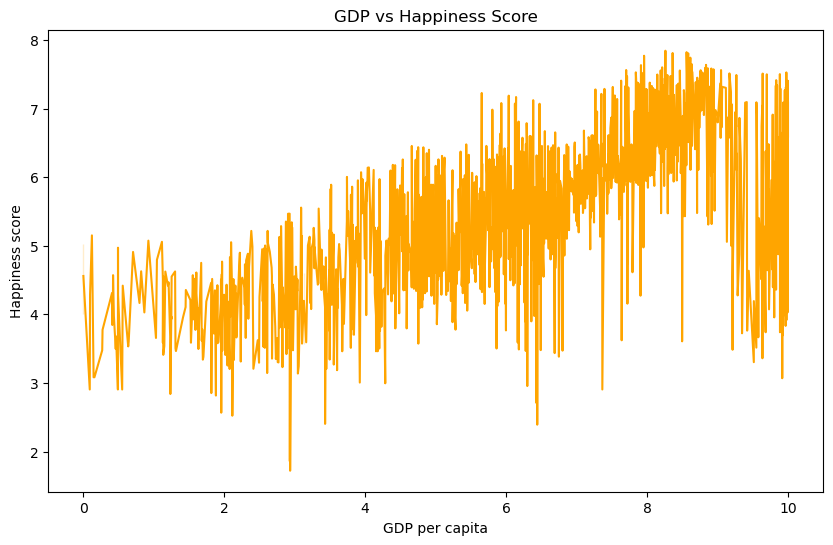

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='GDP per capita', y='Happiness score', data=df, color='orange')
plt.title('GDP vs Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness score')
plt.show()

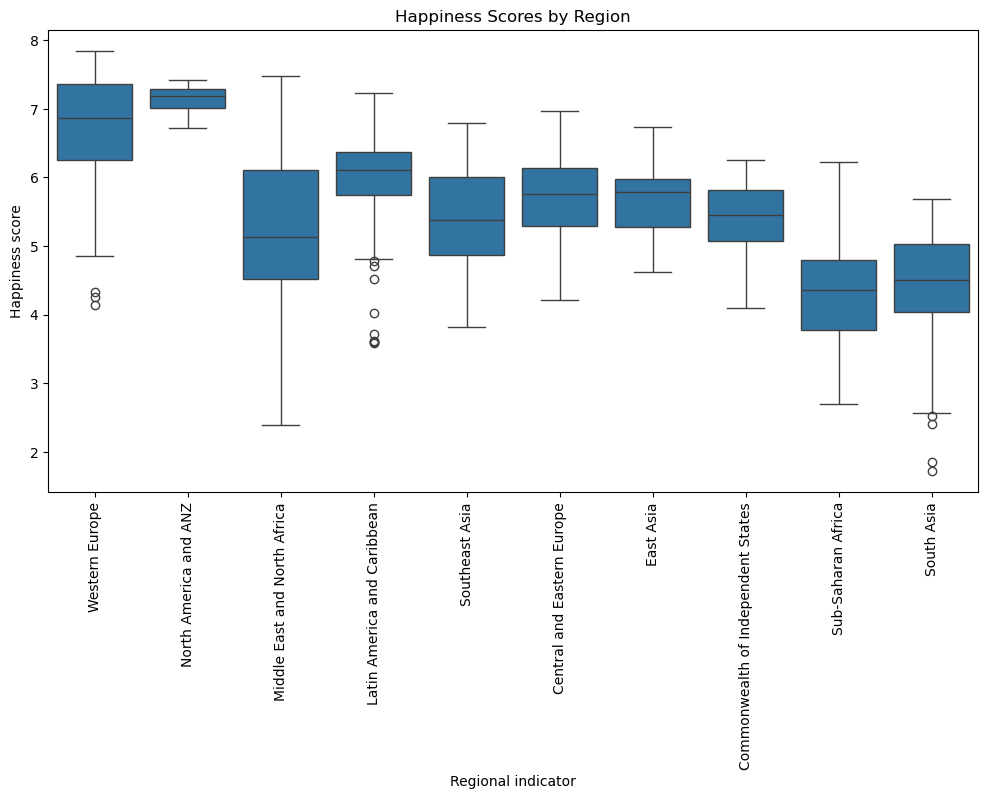

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Regional indicator', y='Happiness score', data=df)
plt.xticks(rotation=90)
plt.title('Happiness Scores by Region')
plt.show()

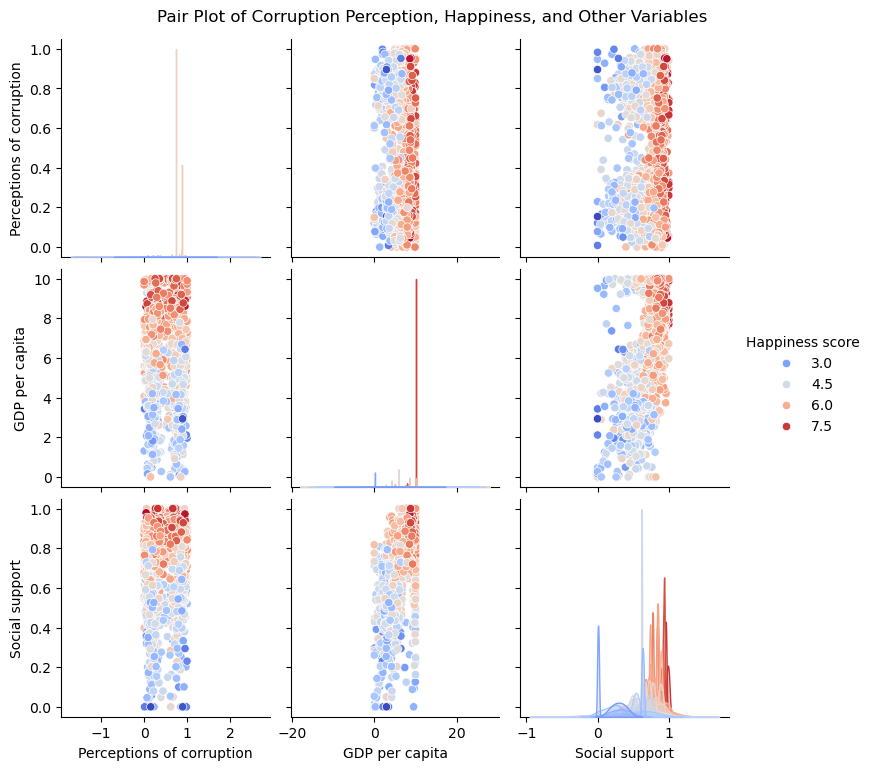

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
pair_data = df[['Perceptions of corruption', 'Happiness score', 'GDP per capita', 'Social support']]
sns.pairplot(pair_data, kind='scatter', diag_kind='kde', hue='Happiness score', palette='coolwarm')
plt.suptitle('Pair Plot of Corruption Perception, Happiness, and Other Variables', y=1.02)
plt.show()


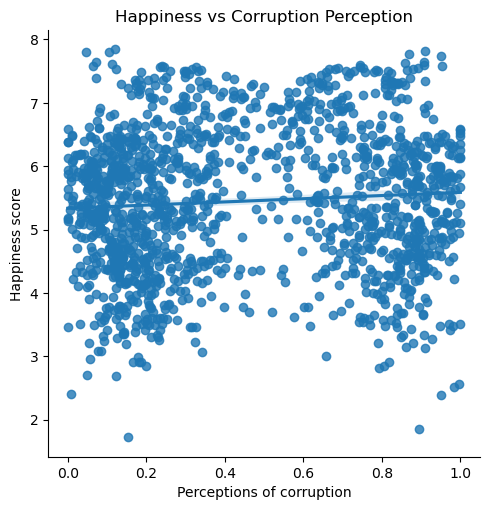

In [13]:
sns.lmplot(x='Perceptions of corruption', y='Happiness score', data=df)
plt.title('Happiness vs Corruption Perception')
plt.show()


In [14]:
X = df[numeric_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_

fig = px.scatter_3d(df, x='GDP per capita', y='Social support', z='Happiness score',
                    color='Cluster', hover_name='Country')
fig.show()


In [15]:
fig = px.choropleth(df,
                    locations='ISO_Code',
                    color='Happiness score',
                    hover_name='Country',
                    animation_frame='Year',
                    title='Animated Global Happiness Over Years')

fig.update_layout(
    autosize=True,  
    height=800,    
    width=800,    
)
fig.show()

In [16]:
fig = px.scatter(df, x='Freedom to make life choices', y='Happiness score',
                 size='GDP per capita', color='Regional indicator',
                 hover_name='Country', title='Happiness vs Freedom')
fig.show()


In [17]:
countries = df['Country'].unique()
fig = px.line(df, x='Year', y='Happiness score', color='Country',
              title='Happiness Score Over Time - Use Dropdown to Filter',
              labels={'Happiness score': 'Happiness Score'})

fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": country,
                    "method": "update",
                    "args": [{"visible": df['Country'].unique() == country},
                             {"title": f"Happiness Score Trend: {country}"}]
                }
                for country in countries
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
fig.show()


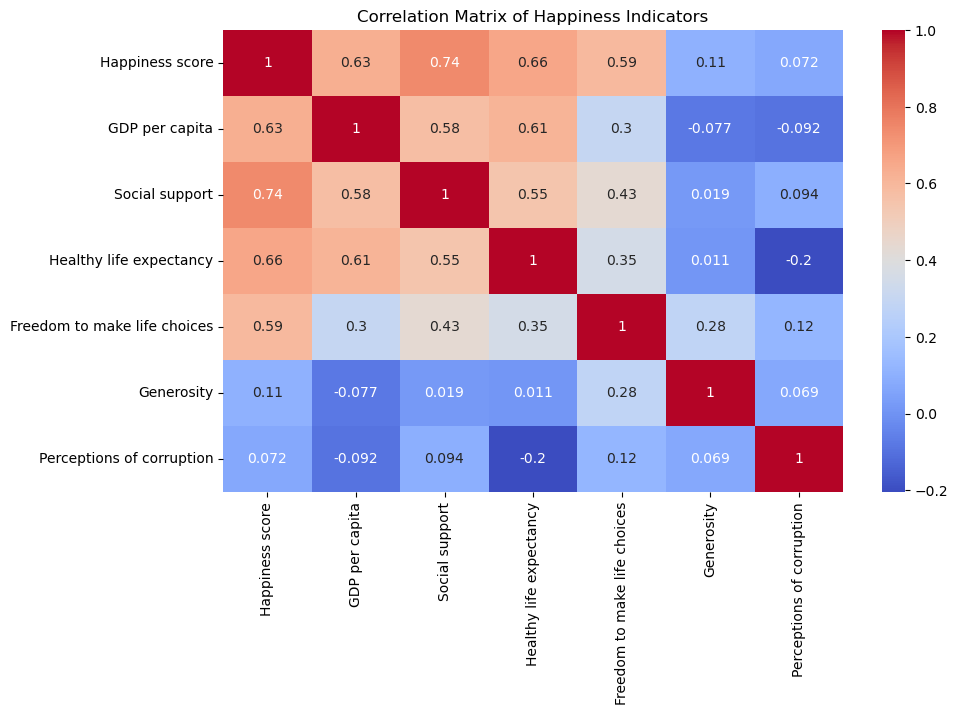

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Happiness Indicators')
plt.show()


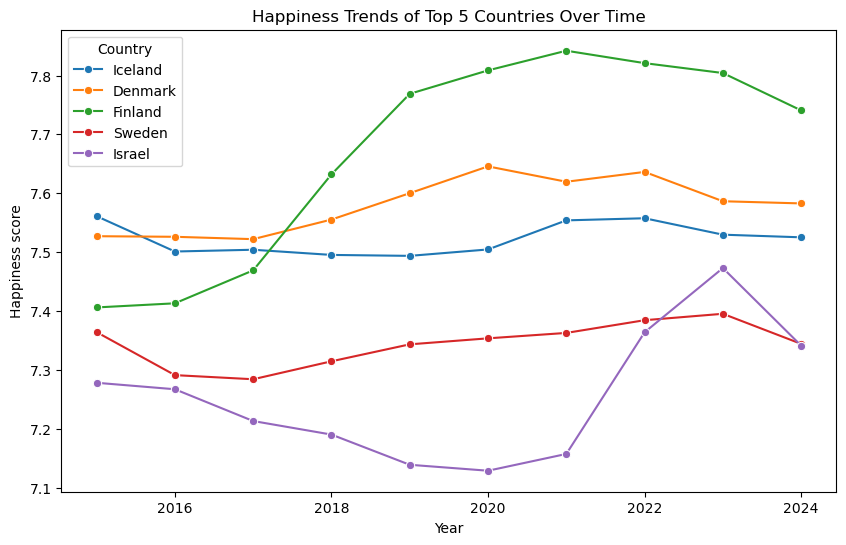

In [19]:
top5_countries = latest_data.nlargest(5, 'Happiness score')['Country']
top5_df = df[df['Country'].isin(top5_countries)]

plt.figure(figsize=(10,6))
sns.lineplot(data=top5_df, x='Year', y='Happiness score', hue='Country', marker='o')
plt.title('Happiness Trends of Top 5 Countries Over Time')
plt.show()
